In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ddm.simulation import (
    generate_tracks, 
    get_diffusion_coefficient, 
    generate_images,
    save_stack
    )

### Set diffusion coefficient

In [2]:
# Set parameters
particle_size = 1e-6 # in meters
eta = 1e-3 # viscosity of water in Pascal-seconds
T = 293 # temperature in Kelvin

D = get_diffusion_coefficient(particle_size, eta, T)
print(f"The calculated diffusion coefficient is {D}")

The calculated diffusion coefficient is 4.2901806459851315e-13


### Create particle trajectory in 2D

In [3]:
# Set parameters
n_particles = 1000
steps = 1000 # time steps in frames
tau = 0.01 # time delta between steps in seconds
drift = (0.0, 0.0) # sample drift in (x,y) in fraction of steps size
window = (512, 512) # image size in pixels (x,y)
pixel_size = 1e-7 # image pixel size in meters

tracks = generate_tracks(n_particles, steps, tau, drift, window, pixel_size, D)
tracks.shape

(1000, 2, 1000)

#### Evaluate diffusion coefficient from simulated tracks

In [4]:
# Calculate diffusion from all tracks
dx = np.diff(tracks[:,0,:]) * pixel_size
dy = np.diff(tracks[:,1,:]) * pixel_size
dsquare = dx**2 + dy**2
D_sim = np.mean(dsquare) / (2 * 2 * tau)
print(f"Expected diffusion coefficient = {D} \nSimulated diffusion coefficient = {D_sim}")

Expected diffusion coefficient = 4.2901806459851315e-13 
Simulated diffusion coefficient = 4.29650667040728e-13


#### Particle motion

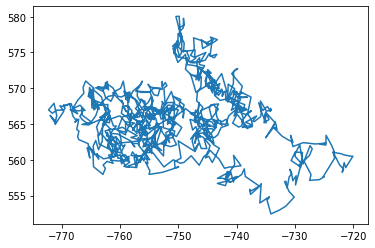

In [5]:
# Single particle movement
x = tracks[0,0,:]
y = tracks[0,1,:]
plt.plot(x, y)
plt.show()

#### Particle displacement

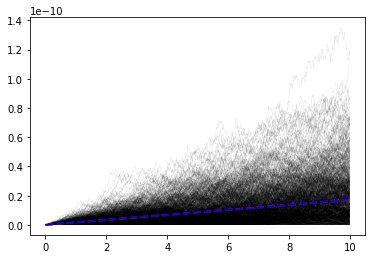

In [6]:
dsquared = []
for particle in range(n_particles):
    x = (tracks[particle,0,:] - tracks[particle,0,0]) * pixel_size
    y = (tracks[particle,1,:] - tracks[particle,1,0]) * pixel_size
    dsquared.append(x**2 + y**2)
    time = np.arange(0, steps*tau, tau)
    plt.plot(time, dsquared[-1], 'k', linewidth=0.04)

# Theoretical displacement without drift
k = np.sqrt(2*D*tau)
z = np.arange(steps) * 2 * k**2
plt.plot(time, z, 'r--', linewidth=2)

# Plot mean displacement of particles
dsquared_mean = np.asarray(dsquared).mean(axis=0)
plt.plot(time, dsquared_mean, 'b--', linewidth=2)
plt.show()

### Generate microscopy images

In [7]:
stack = generate_images(tracks)

100%|██████████| 1000/1000 [00:20<00:00, 49.98it/s]


In [8]:
type(stack)

numpy.ndarray

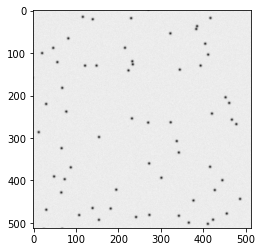

In [9]:
# Inspect frame
plt.imshow(stack[0], cmap="gray")
plt.show()

### Save images as .tif

In [10]:
file_path = "../data/test_dataset.tif"
save_stack(file_path, stack)